# Evaluating poses

<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#inspect">Task 1: Visually inspect and compare poses</a>
            </li>
            <li>
            <a href="#dist">Task 2: Calculate pose distance</a>
            </li>
            <li>
            <a href="#comparison">Task 3: Mandatory task</a>
            </li>
            <li>
            <a href="#comparison2">Task 4: Compare poses</a>
            </li>
        </ul>
    </div>
</article>

In this exercise you will compare distances between high-dimensional vectors of human poses (from a dataset of badminton poses). The dataset contains 18 sample poses, each defined by 25 points $(x_i, y_i)$. Your task is to calculate the Euclidean distance ($L_2$-norm) between all poses.
The dataset is loaded and stored in an $18\times 50$-dimensional Numpy array:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

poses = np.load("data/poses.npy")

Each row in `poses`
 has the form $x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}$, i.e. it is a list of $50$ elements constituting $25$ points:


In [2]:
# Get the first pose and print it
print(poses[0])

[-27.99571178  -6.48683038  -0.11660905  -1.17064333   0.84333174
  -1.17055863   1.40324612  -0.75536782   1.64424262  -0.39685233
  -0.91658014  -1.19784466  -1.47706657  -0.75565014  -1.63809865
  -0.67290277  -0.0346016   -0.2573026    0.52441385  -0.28487094
   0.92472628   0.2406497    1.08637127   0.87586495  -0.35960773
  -0.2296778   -0.75350502   0.46266449  -0.75767282   1.26336037
 -27.99571178  -6.48683038 -27.99571178  -6.48683038   0.4412623
  -1.52924351  -0.43720223  -1.53048571  -1.23831741   1.26319098
  -1.39460965   1.34502082  -0.67480729   1.34740641   0.68458786
   1.12472817   1.08424651   1.09708925   1.16224962   0.93142511]


_Note that the output above is still a 1D array, it is simply printed over multiple lines_
The following cell contains a set of functions for plotting the poses. You do not need to study these - simply skip to the next section:


In [3]:
def limb_number_plot(s_pose_x,s_pose_y,n1,n2,c="red",label=None,axis = None):
  if label is not None:
    if (s_pose_x[n1]>-10.0) and (s_pose_x[n2]>-10.0) and (s_pose_y[n1]>-10.0) and (s_pose_y[n2]>-10.0):
        axis.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-",label=label)
  else:
    if (s_pose_x[n1]>-10.0) and (s_pose_x[n2]>-10.0) and (s_pose_y[n1]>-10.0) and (s_pose_y[n2]>-10.0):
        axis.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-")

def plot_single_pose(s_pose, a, c = "darkgreen", label=None, head = True):
    s_pose_x=s_pose[::2]
    s_pose_y=s_pose[1::2]
    limb_number_plot(s_pose_x,s_pose_y,2,5,c,axis=a)
    if label is not None:

        limb_number_plot(s_pose_x,s_pose_y,9,12,c,label,axis=a)
    else:
        limb_number_plot(s_pose_x,s_pose_y,9,12,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,2,9,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,5,12,c,axis=a)

    limb_number_plot(s_pose_x,s_pose_y,2,3,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,3,4,c,axis=a)

    limb_number_plot(s_pose_x,s_pose_y,5,6,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,6,7,c,axis=a)

    #left leg / foot
    limb_number_plot(s_pose_x,s_pose_y,9,10,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,10,11,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,11,22,c,axis=a)

    #right leg / foot
    limb_number_plot(s_pose_x,s_pose_y,12,13,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,13,14,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,14,19,c,axis=a)

    # head
    if head:
        limb_number_plot(s_pose_x,s_pose_y,0,15,c,axis=a)
        limb_number_plot(s_pose_x,s_pose_y,0,16,c,axis=a)

        limb_number_plot(s_pose_x,s_pose_y,15,17,c,axis=a)
        limb_number_plot(s_pose_x,s_pose_y,16,18,c,axis=a)
    return True

The cell below visualises each pose in the dataset:


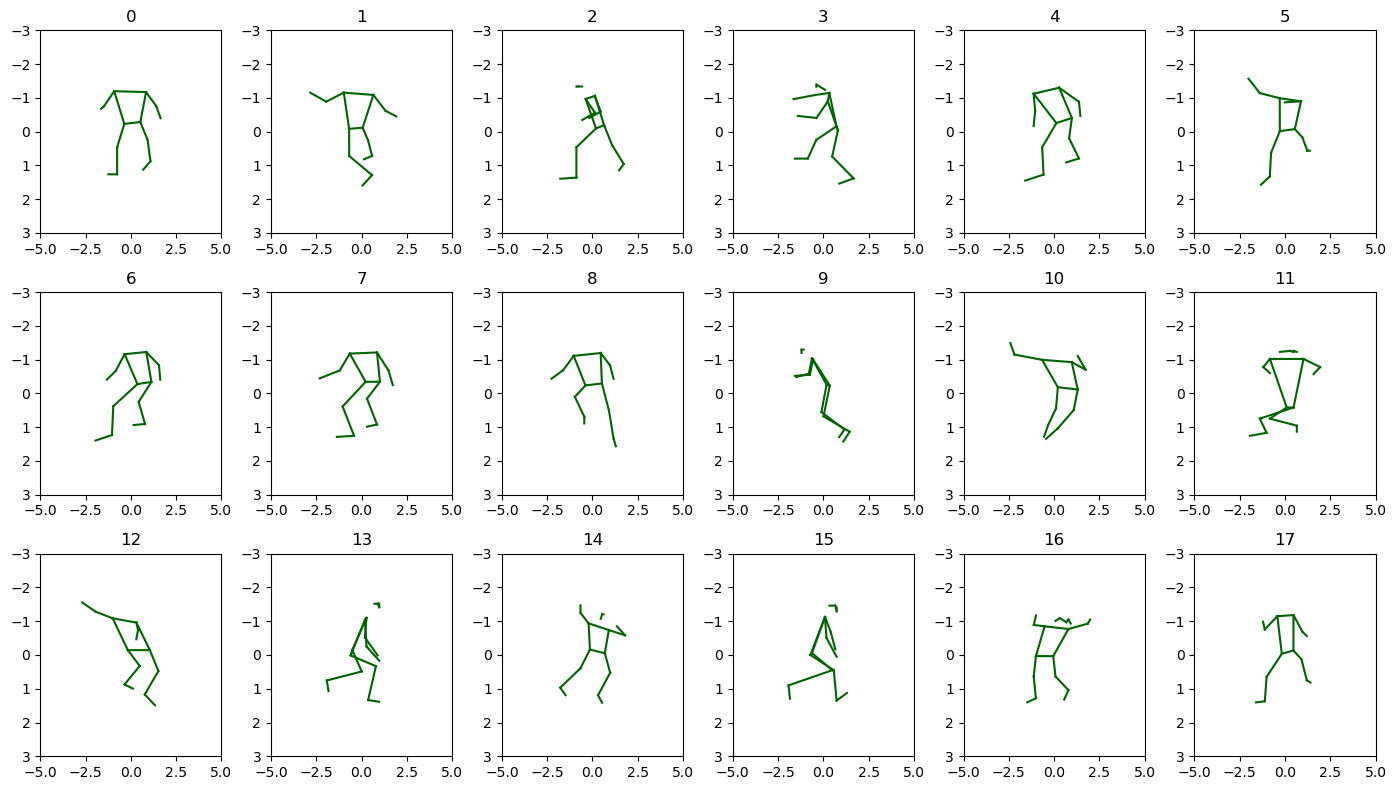

In [ ]:
# Create a 6x3 grid of subplots
fig, ax = plt.subplots(3, 6, figsize=(14, 8))

for i, p in enumerate(poses):
    axis = ax[i//6, i%6] # Select the appropriate subplot
    plot_single_pose(p, axis)

    axis.set_title(i)
    axis.set_xlim(-5, 5)
    axis.set_ylim(3,-3)

plt.tight_layout()

#### Task 1: Visually inspect and compare poses

1. Choose the three pairs of poses that look most similar and note their indices.
    - Figures 4, 6, 7 
2. Choose the three pairs of poses that look least similar and note their indices.
    - Figures 1, 9, 11 

#### Task 2: Calculate pose distance

Calculate the Euclidean distance ($L_2$ norm) between all the poses.

1. In the cell below, calculate the Euclidean distance between each combination of poses and store the result in an $18\times 18$ matrix called `res` (the name is important as the variable is used below) such that the distance between `poses[i]` and `poses[j]` is in position $i, j$ in the matrix.



In [5]:
# Write your solution here
# Task 1:
# Most similar: Figure 4, 6, 7
# Least similar: Figure 1, 9, 11

np_poses = np.array(poses)
res = []

for i in range(len(poses)):
  distances = [np.linalg.norm(poses[i] - poses[j]) for j in range(len(poses))]
  res.append(distances)

# for hver pose i poses, regn afstanden ud til hver anden pose


The following cell creates an 18x18 distance matrix: 


<Axes: >

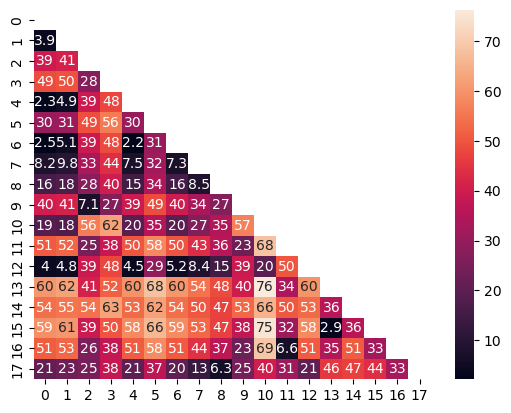

In [6]:
import seaborn as sns
t = np.triu(np.ones_like(res))
sns.heatmap(res, annot=True, mask=t)

<article class="message task"><a class="anchor" id="comparison"></a>
    <div class="message-header">
        <span>Task 3: Mandatory task</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


The mandatory part of the exercise has to be entered in [Grasple](https://app.grasple.com/#/courses/10532/ci/733917/diagnoses/12885)
 and requires you to complete question 1.
1. Determine the three most similar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them using the plotting function `plot_pair`
.
2. Determine the three most dissimilar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them.



</div></article>



Res[4][6]: 2.2114718226569177
Res[0][4]: 2.297434201974493
Res[0][6]: 2.5004651789651153
Res[10][13]: 76.25053410711986
Res[10][15]: 74.94811034476399
Res[10][16]: 68.82671465253037


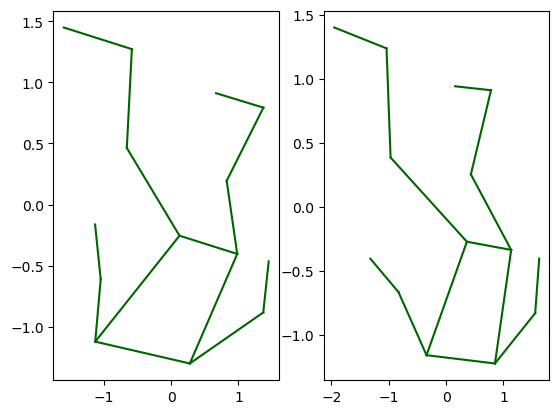

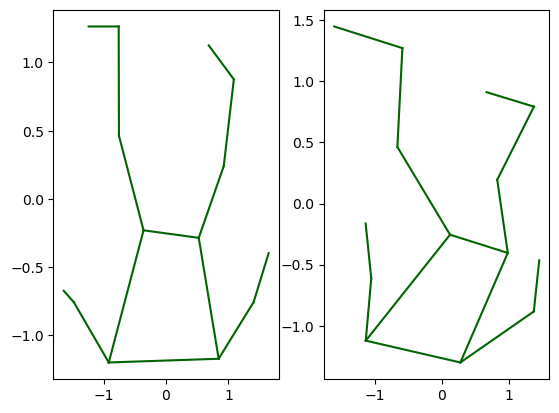

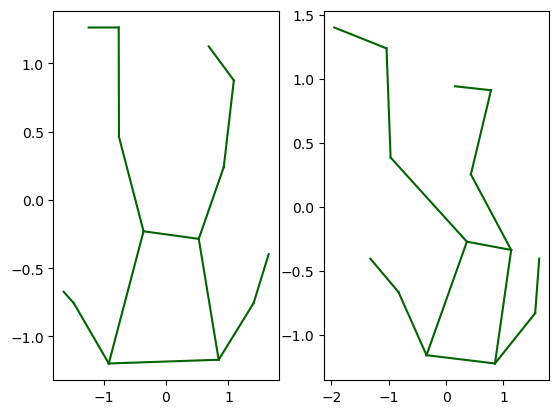

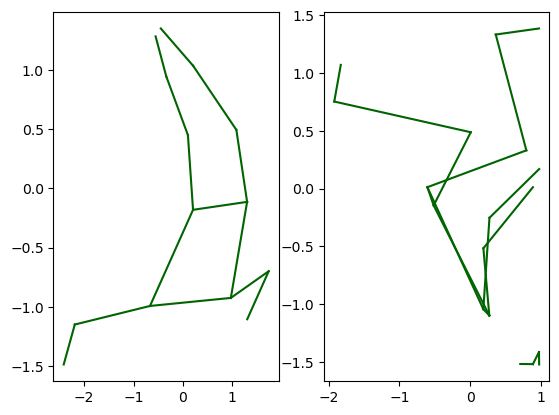

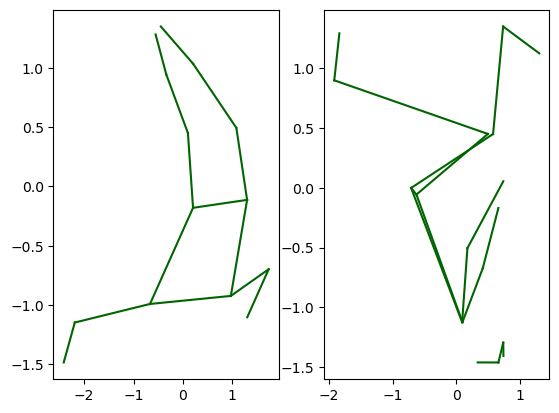

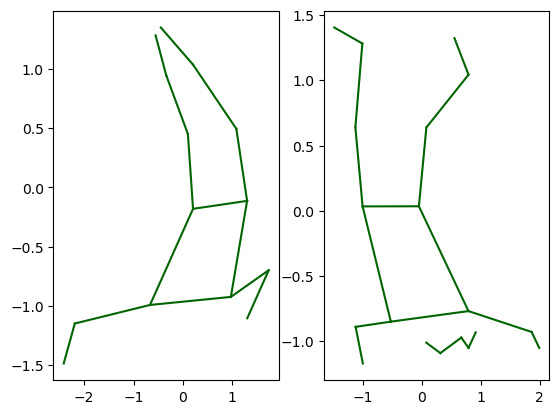

In [60]:
def plot_single(ax, i, p):
    ax.scatter(p[:, 0], p[:, 1]) # Plot the pose coordinates

    ax.set_title(i)
    ax.set_xlim(-5, 5)
    ax.set_ylim(3,-3)

def plot_pair(a, b):
    """Plot two poses side by side. a and b are indices."""
    fig, ax = plt.subplots(1, 2)

    ap = poses[a]
    bp = poses[b]

    plot_single_pose(ap, ax[0])
    plot_single_pose(bp, ax[1])

# Write your solution here

# I use triu to replace irrelevant values, like duplicates and self-comparisons with a high number.
# I flatten the array to simplify sorting for smaller values.
# I use argsort to find the indices that hold the lowest values.
# I use unravel_index to convert one-dimensional indices back to matrix values.

arr = np.array(res)

# Get the 3 smallest:
# ------------------------------------------------------------------------
# Triu with big number
def get_smallest():
    # Return a copy of an array with the elements below the k-th diagonal zeroed.
    triu_matrix = np.triu(arr, k=0)             # Get the upper triangular part 
    triu_matrix[triu_matrix == 0.0] = 999.0     # Replace all 0.0 values with 999.0, to avoid them on sort

    flat_arr = triu_matrix.flatten()
    flat_indices = np.argsort(flat_arr)[:3]
    multi_indices = np.unravel_index(flat_indices, triu_matrix.shape)
    multi_indices = list(zip(*multi_indices))

    pose_1, pose_2 = multi_indices[0]
    pose_3, pose_4 = multi_indices[1]
    pose_5, pose_6 = multi_indices[2]

    print(f"Res[{pose_1}][{pose_2}]: {triu_matrix[pose_1][pose_2]}")
    print(f"Res[{pose_3}][{pose_4}]: {triu_matrix[pose_3][pose_4]}")
    print(f"Res[{pose_5}][{pose_6}]: {triu_matrix[pose_5][pose_6]}")

    plot_pair(pose_1, pose_2)
    plot_pair(pose_3, pose_4)
    plot_pair(pose_5, pose_6)

# Get the 3 biggest:
# ------------------------------------------------------------------------
def get_biggest():
    triu_matrix = np.triu(arr)                  # No need to replace 0 values here, as we are looking for biggest
    flat_arr = triu_matrix.flatten()
    flat_indices = np.argsort(flat_arr)[-3:]
    multi_indices = np.unravel_index(flat_indices, triu_matrix.shape)
    multi_indices = list(zip(*multi_indices))

    pose_1, pose_2 = multi_indices[2]
    pose_3, pose_4 = multi_indices[1]
    pose_5, pose_6 = multi_indices[0]

    print(f"Res[{pose_1}][{pose_2}]: {triu_matrix[pose_1][pose_2]}")
    print(f"Res[{pose_3}][{pose_4}]: {triu_matrix[pose_3][pose_4]}")
    print(f"Res[{pose_5}][{pose_6}]: {triu_matrix[pose_5][pose_6]}")

    plot_pair(pose_1, pose_2)
    plot_pair(pose_3, pose_4)
    plot_pair(pose_5, pose_6)

get_smallest()
get_biggest()
    

<article class="message task"><a class="anchor" id="comparison2"></a>
    <div class="message-header">
        <span>Task 4: Compare poses</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the pose-pairs you chose in [Task 1](#inspect) with the calculated pose-pairs. How well did your intuition match the calculated result?



</div></article>



In [ ]:
# write your reflections here